Filename: ./data/correctframe/frame-i-006366-4-0132.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   
None


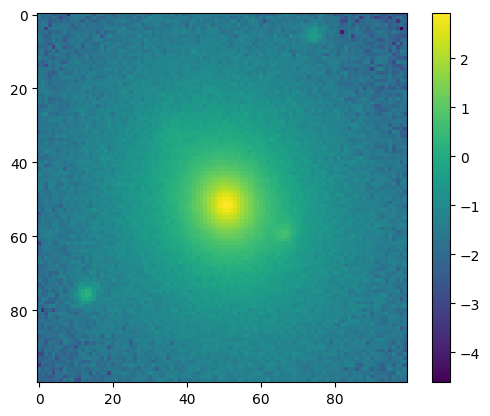

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# NGC7597 349.62597 18.68925

bandlist = ["g","i","r","u","z"] # use i band
halfwidth_cut = 50
center_cut = (470, 1613)

filename_image = "./data/correctframe/frame-i-006366-4-0132.fits"

hdul = fits.open(filename_image)

print(hdul.info())

fitdata = hdul[0].data

# center: (470, 1613)
fitdata_cut = fitdata[center_cut[0]-halfwidth_cut:center_cut[0]+halfwidth_cut,
                        center_cut[1]-halfwidth_cut:center_cut[1]+halfwidth_cut]

logdata = np.log(np.abs(fitdata_cut))

plt.figure()
plt.imshow(logdata)
plt.axis("scaled")
plt.colorbar()

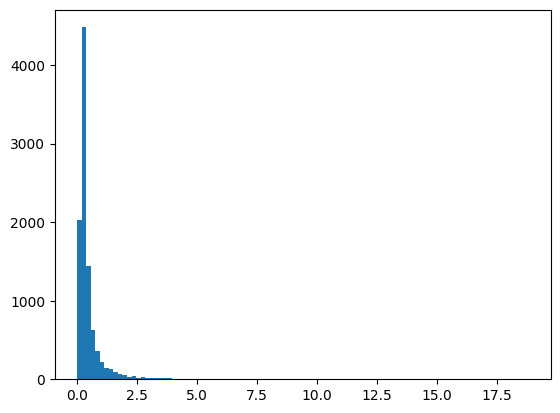

In [2]:
flatlogdata = fitdata_cut.flatten()

plt.figure()
plt.hist(flatlogdata,bins=100)
plt.show()

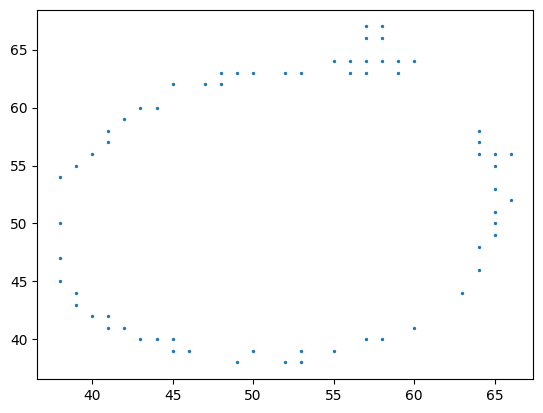

In [3]:
def get_contour_index(x_dn, x_up, data):
    data_judge = (data<x_up)&(data>=x_dn)
    return np.where(data_judge==True)

def get_coordinate(index,shape):
    return [index//shape[0],index%shape[0]]

X, Y = get_contour_index(1.5,1.6,fitdata_cut)
plt.figure()
plt.scatter(X,Y,s=2)
plt.show()
# coor_list = [get_coordinate(x,flatlogdata.shape) for x in get_contour_index(1,1.1,flatlogdata)]

# print(coor_list)


In [ ]:
x = np.array([[1,1,4,5],[1,4,1,9],[1,9,1,8],[0,8,9,3]])